In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import joblib

warnings.filterwarnings('ignore')
sns.set(style='whitegrid')

In [20]:
df=pd.read_csv(r"C:\Users\jagad\Desktop\Dataset\Heart Attack.csv")

In [21]:
df.head()

,Patient_ID,age,bmi,systolic_bp,diastolic_bp,cholesterol_mg_dl,resting_heart_rate,smoking_status,daily_steps,stress_level,physical_activity_hours_per_week,sleep_hours,family_history_heart_disease,diet_quality_score,alcohol_units_per_week,heart_disease_risk_score,risk_category
0,1,62,25.0,142,93,247,72,Never,11565,3,5.6,8.2,No,7,0.7,28.1,Medium
1,2,54,29.7,158,101,254,74,Current,4036,8,0.5,6.7,No,5,4.5,63.0,High
2,3,46,36.2,170,113,276,80,Current,3043,9,0.4,4.0,No,1,20.8,73.1,High
3,4,48,30.4,153,98,230,73,Former,5604,5,0.6,8.0,No,4,8.5,39.5,Medium
4,5,46,25.3,139,87,206,69,Current,7464,1,2.0,6.1,No,5,3.6,29.3,Medium


In [22]:
df.shape

(5500, 17)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Patient_ID                        5500 non-null   int64  
 1   age                               5500 non-null   int64  
 2   bmi                               5500 non-null   float64
 3   systolic_bp                       5500 non-null   int64  
 4   diastolic_bp                      5500 non-null   int64  
 5   cholesterol_mg_dl                 5500 non-null   int64  
 6   resting_heart_rate                5500 non-null   int64  
 7   smoking_status                    5500 non-null   object 
 8   daily_steps                       5500 non-null   int64  
 9   stress_level                      5500 non-null   int64  
 10  physical_activity_hours_per_week  5500 non-null   float64
 11  sleep_hours                       5500 non-null   float64
 12  family

In [24]:
df.describe()

,Patient_ID,age,bmi,systolic_bp,diastolic_bp,cholesterol_mg_dl,resting_heart_rate,daily_steps,stress_level,physical_activity_hours_per_week,sleep_hours,diet_quality_score,alcohol_units_per_week,heart_disease_risk_score
count,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000,5500.000000
mean,2750.500000,53.872000,28.170818,147.248182,95.756727,239.684182,74.075091,5902.929455,4.907091,3.299364,6.869364,5.162909,3.782200,37.540455
std,1587.857571,21.196017,4.189877,13.222701,9.451559,28.570177,6.392166,3041.084590,2.298173,2.672457,1.091263,2.286134,3.515594,24.287026
min,1.000000,18.000000,15.000000,108.000000,64.000000,147.000000,48.000000,500.000000,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000
25%,1375.750000,36.000000,25.200000,138.000000,89.000000,220.000000,70.000000,3428.000000,3.000000,1.200000,6.200000,3.000000,1.200000,18.400000
50%,2750.500000,54.000000,28.400000,147.000000,96.000000,240.000000,74.000000,5460.000000,5.000000,2.600000,6.900000,5.000000,2.800000,36.700000
75%,4125.250000,72.000000,31.100000,156.000000,102.000000,260.000000,79.000000,7772.000000,7.000000,4.900000,7.600000,7.000000,5.300000,55.500000
max,5500.000000,90.000000,40.900000,192.000000,120.000000,331.000000,92.000000,16793.000000,10.000000,12.900000,10.000000,10.000000,29.200000,100.000000


In [25]:
df.columns

Index(['Patient_ID', 'age', 'bmi', 'systolic_bp', 'diastolic_bp',
       'cholesterol_mg_dl', 'resting_heart_rate', 'smoking_status',
       'daily_steps', 'stress_level', 'physical_activity_hours_per_week',
       'sleep_hours', 'family_history_heart_disease', 'diet_quality_score',
       'alcohol_units_per_week', 'heart_disease_risk_score', 'risk_category'],
      dtype='object')

In [26]:
df.isnull().sum()

Patient_ID                          0
age                                 0
bmi                                 0
systolic_bp                         0
diastolic_bp                        0
cholesterol_mg_dl                   0
resting_heart_rate                  0
smoking_status                      0
daily_steps                         0
stress_level                        0
physical_activity_hours_per_week    0
sleep_hours                         0
family_history_heart_disease        0
diet_quality_score                  0
alcohol_units_per_week              0
heart_disease_risk_score            0
risk_category                       0
dtype: int64

In [27]:
df.drop("Patient_ID", axis=1, inplace=True)

In [28]:
target = 'heart_disease_risk_score'

In [29]:
df.select_dtypes(include='object').columns

Index(['smoking_status', 'family_history_heart_disease', 'risk_category'], dtype='object')

In [30]:
le = LabelEncoder()

for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# EDA (Exploratory Data analysis)

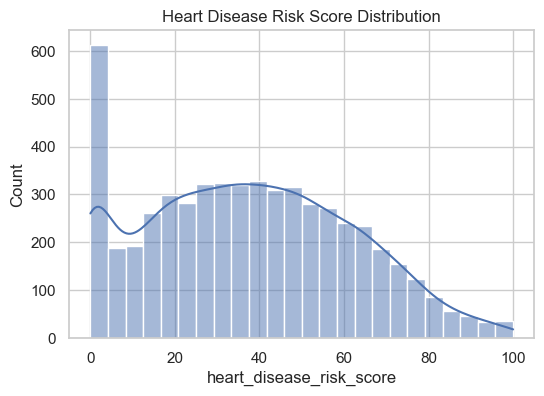

In [31]:
#Target Distribution
plt.figure(figsize=(6,4))
sns.histplot(df[target], kde=True)
plt.title("Heart Disease Risk Score Distribution")
plt.show()

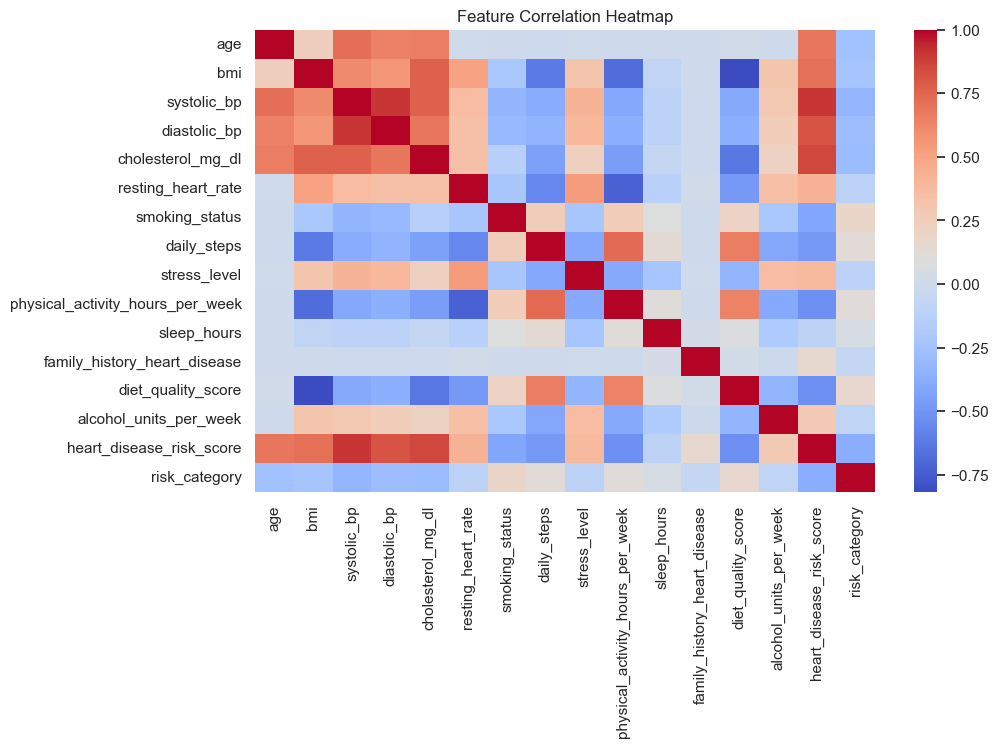

In [32]:
#Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [33]:
X = df.drop(target, axis=1)
y = df[target]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Feature Scaling

In [36]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [37]:
model = RandomForestRegressor(
    n_estimators=200,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [38]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('MAE:', mae)
print('MSE:', mse)
print('RMSE', rmse)
print('R2 Score:', r2)

MAE: 3.243925454545453
MSE: 17.167308740909075
RMSE 4.143345114869033
R2 Score: 0.9706379718047569


In [43]:
importance = model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance' : importance
}).sort_values(by='Importance', ascending=False)

feature_importance_df

,Feature,Importance
14,risk_category,0.683806
2,systolic_bp,0.225355
4,cholesterol_mg_dl,0.034421
11,family_history_heart_disease,0.008560
9,physical_activity_hours_per_week,0.008394
0,age,0.008194
6,smoking_status,0.007253
1,bmi,0.006436
7,daily_steps,0.003620
5,resting_heart_rate,0.003072


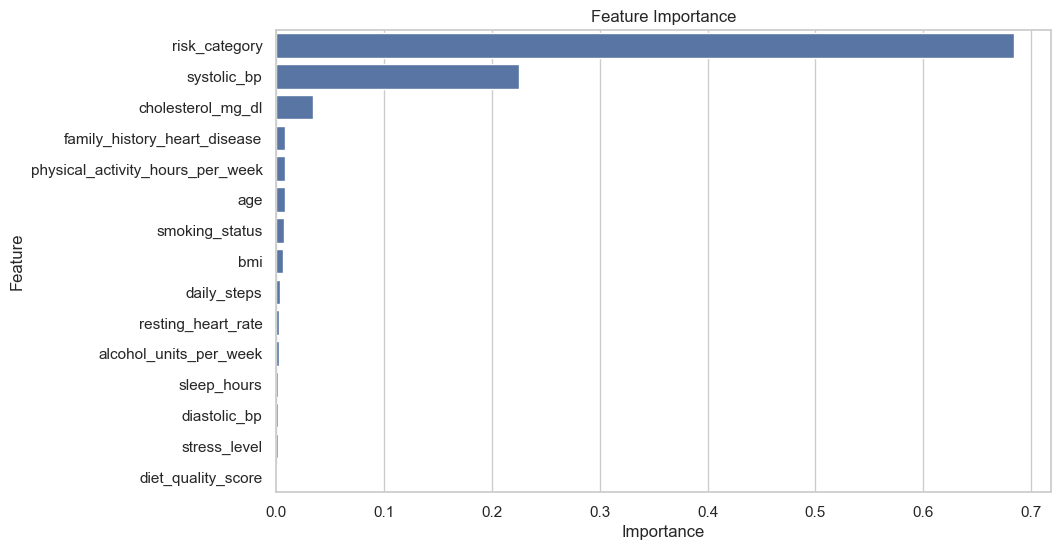

In [44]:
plt.figure(figsize=(10,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df
)
plt.title('Feature Importance')
plt.show()

In [45]:
joblib.dump(model, 'heart_risk_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [47]:
#Example user input
new_user = np.array([[  
    45,   # age
    27.5, # bmi
    140,  # systolic_bp
    90,   # diastolic_bp
    220,  # cholesterol
    72,   # heart rate
    1,    # smoking_status
    6000, # daily_steps
    6,    # stress_level
    3,    # physical_activity_hours
    6.5,  # sleep_hours
    1,    # family_history
    7,    # diet_quality
    2     # alcohol_units
]])

In [50]:
# First, define the missing_feature_value variable with an appropriate value
missing_feature_value = 0  # Replace with the appropriate value for your missing feature

# Option 1: Make sure new_user has the correct number of features
# Check which feature is missing and add it
new_user = np.append(new_user, [missing_feature_value])  # Add the missing feature
# Reshape if needed for a single sample
new_user = new_user.reshape(1, -1)  # Reshape to (1, 15) for a single sample

# Option 2: If you need to retrain the scaler with the correct features
# scaler = StandardScaler()
# scaler.fit(X_train)  # Where X_train has 14 features

# Then transform and predict
new_user_scaled = scaler.transform(new_user)
risk_score = model.predict(new_user_scaled)

print("Predicted Heart Risk Score:", risk_score[0])

Predicted Heart Risk Score: 59.65099999999998


In [51]:
def risk_label(score):
    if score < 30:
        return "Low Risk"
    elif score < 60:
        return "Medium Risk"
    else:
        return "High Risk"

print("Risk Level:", risk_label(risk_score[0]))

Risk Level: Medium Risk
